# Texi Guru Kaggle Challange
* Step 1: Data importing

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler



from sklearn.metrics import mean_squared_error

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#* Regression problems
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV


##### Reading test data and train data

In [4]:
try: # For kaggle
  train_pd = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

  test_pd = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')
  print('running on kaggle')
except: #for local machine 
  print('running on local machine')
  train_pd = pd.read_csv('train.csv')
  test_pd = pd.read_csv('test.csv')
  pass
copy_train_pd = train_pd.copy()
copy_test_pd = test_pd.copy()
train_pd.info()


running on local machine
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amoun

##### Computing the null values and missing values from the tables

In [5]:
train_pd.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [6]:
train_pd.isna().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

In [7]:
train_pd = copy_train_pd.copy()

y = train_pd['total_amount']
X = train_pd.drop('total_amount', axis=1) # seprating prediction element from training set
list_of_features = list(train_pd)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train_copy = x_train.copy()
x_test_copy = x_test.copy()


## Preprocessing section
* selecting the features for imputation
* transform each feature into same scale
* plotting each feature with respect to each one
* finding the corelation between features

In [9]:
print('Null values in the given training data set is:')
x_train.isna().sum()

Null values in the given training data set is:


VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          4864
trip_distance               0
RatecodeID               4864
store_and_fwd_flag       4864
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     4864
Airport_fee              4864
dtype: int64

#### Checking unique values of nan elements

In [10]:
x_train_copy.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
171080,1,2023-06-29 10:04:25,2023-06-29 09:02:42,1.0,1.43,1.0,N,129,97,Credit Card,0.0,7.203678,0.0,1.0,2.5,0.0
72786,1,2023-06-29 19:39:30,2023-06-29 21:06:03,1.0,5.49,1.0,N,108,15,Credit Card,2.5,8.235836,0.0,1.0,2.5,0.0
112272,1,2023-06-30 07:21:37,2023-06-30 07:47:09,1.0,1.73,1.0,N,253,193,Credit Card,0.0,3.406917,0.0,1.0,2.5,0.0
77581,1,2023-06-30 17:35:54,2023-06-30 16:51:15,1.0,1.65,1.0,N,167,121,Credit Card,2.5,4.773043,0.0,1.0,2.5,0.0
79737,1,2023-06-30 17:17:34,2023-06-30 16:55:28,4.0,1.44,1.0,N,255,222,Cash,2.5,0.374787,0.0,1.0,2.5,0.0


In [11]:
print(f'''
unique values of passanger_count is: {x_train['passenger_count'].unique()}\n
unique values of RateCodeId is: {x_train['RatecodeID'].unique()}\n
unique values of store_and_fwd_flag is: {x_train['store_and_fwd_flag'].unique()}\n
unique values of congestion_surcharge is: {x_train['congestion_surcharge'].unique()}\n
unqiue values of airport_fees is: {x_train['Airport_fee'].unique()}\n
''')




unique values of passanger_count is: [ 1.  4. nan  6.  2.  3.  0.  5.  8.  9.]

unique values of RateCodeId is: [ 1. nan  2.  3. 99.  5.  4.]

unique values of store_and_fwd_flag is: ['N' nan 'Y']

unique values of congestion_surcharge is: [ 2.5  nan  0.  -2.5]

unqiue values of airport_fees is: [ 0.     nan  1.75 -1.75]




#### Seprating number values and categorical variables

### Creating pipelines for data processing

##### converting datetime into date time object

In [12]:
def convert_dt_obj_to_datetime(df:pd.DataFrame, col_name:str):
    df[col_name] = pd.to_datetime(df[col_name])
    df[col_name +'_Year'] = df[col_name].apply(lambda time: time.year)
    df[col_name +'_Month'] = df[col_name].apply(lambda time: time.month)
    df[col_name +'_Day'] = df[col_name].apply(lambda time: time.day)
    df[col_name +'_Hour'] = df[col_name].apply(lambda time: time.hour)
#     df[col_name +'_Minute'] = df[col_name].apply(lambda time: time.minute) # IGNORING MINS

In [13]:
x_train, x_test = x_train_copy.copy(), x_test_copy.copy()
  
convert_dt_obj_to_datetime(x_train, 'tpep_pickup_datetime')
convert_dt_obj_to_datetime(x_test, 'tpep_pickup_datetime')
x_train = x_train.drop('tpep_pickup_datetime', axis= 1)
x_test = x_test.drop('tpep_pickup_datetime', axis= 1)

convert_dt_obj_to_datetime(x_train, 'tpep_dropoff_datetime')
convert_dt_obj_to_datetime(x_test, 'tpep_dropoff_datetime')

x_train = x_train.drop('tpep_dropoff_datetime', axis= 1)
x_test = x_test.drop('tpep_dropoff_datetime', axis= 1)

x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140000 entries, 171080 to 128145
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   VendorID                     140000 non-null  int64  
 1   passenger_count              135136 non-null  float64
 2   trip_distance                140000 non-null  float64
 3   RatecodeID                   135136 non-null  float64
 4   store_and_fwd_flag           135136 non-null  object 
 5   PULocationID                 140000 non-null  int64  
 6   DOLocationID                 140000 non-null  int64  
 7   payment_type                 140000 non-null  object 
 8   extra                        140000 non-null  float64
 9   tip_amount                   140000 non-null  float64
 10  tolls_amount                 140000 non-null  float64
 11  improvement_surcharge        140000 non-null  float64
 12  congestion_surcharge         135136 non-null  float64
 13 


Creating pipeline for remaining variable

In [14]:
congestion_charger_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 0)),
#     ('standard_scaler', StandardScaler())
])

airport_fee_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 0)),
#     ('standard_scaler', StandardScaler())
])

rate_code_id_pipe = Pipeline([
     ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 1)),
#     ('standard_scaler', StandardScaler())
])
store_and_fwd_pipe = Pipeline([
    ('simple_immmputer', SimpleImputer(missing_values= np.nan, strategy='constant', fill_value='N')),
    ('one_hot_encoder', OneHotEncoder())
])
payment_type_pipe = Pipeline([
    ('one_hot_encoder', OneHotEncoder())
])
passanger_count_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 0)),
#     ('standard_scaler', StandardScaler())
])



creating column transformers

In [15]:
main_pipeline = ColumnTransformer([
    # ('vendor_id',  StandardScaler(), ["VendorID"]),
    ("passanger_count_t", passanger_count_pipe, ["passenger_count"]),
    ('trip_distance_t', StandardScaler(), ['trip_distance']),
    ('rate_code_id', rate_code_id_pipe, ['RatecodeID'] ),
    ('s_nd_f_flag', store_and_fwd_pipe, ['store_and_fwd_flag']),
    ('pu_loc', StandardScaler(), ['PULocationID']),
    ('du_loc', StandardScaler(), ["DOLocationID"]),
    ('payment_t', payment_type_pipe, ["payment_type"]),
    ('extra_t', StandardScaler(), ['extra']),
    ('tip_amoun_t', StandardScaler(), ['tip_amount']),
    ('tolls_amount_t', StandardScaler(), ["tolls_amount"]),
    ('improvement_c', StandardScaler(), ['improvement_surcharge']),
    ('cong_charge', congestion_charger_pipe, ['congestion_surcharge']),
    ('Airport_fee_t', airport_fee_pipe, ['Airport_fee']),
    ('std_scaler', StandardScaler(), [i for i in range(14, 22)])
], remainder= 'passthrough' )
main_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('passanger_count_t',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'))]),
                                 ['passenger_count']),
                                ('trip_distance_t', StandardScaler(),
                                 ['trip_distance']),
                                ('rate_code_id',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=1,
                                                                strategy='constant'))]),
                                 ['RatecodeI...
                                ('improvement_c', StandardScaler(),
                                 ['improvement_surcharge']),
                                ('cong_charge',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'))]),
                                 ['congestion_surcharge']),
                                ('Airport_fee_t',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'))]),
                                 ['Airport_fee']),
                                ('std_scaler', StandardScaler(),
                                 [14, 15, 16, 17, 18, 19, 20, 21])])

In [16]:
main_pipeline.fit(x_train)
x_train_t = main_pipeline.transform(x_train)
x_train_t = pd.DataFrame(x_train_t)
# print(x_train_t.isna().sum())

# x_train_t.head()
# x_train.info()


### Transforming test data

In [17]:
test_pd = copy_test_pd.copy()
convert_dt_obj_to_datetime(test_pd, 'tpep_pickup_datetime')
test_pd = test_pd.drop('tpep_pickup_datetime', axis= 1)

convert_dt_obj_to_datetime(test_pd, 'tpep_dropoff_datetime')
test_pd = test_pd.drop('tpep_dropoff_datetime', axis= 1)


# checking data using leanear regression

In [18]:
lr = LinearRegression()
lr.fit(X=x_train_t, y= y_train)
print('mse after basic transformation is:', mean_squared_error(y_train, lr.predict(x_train_t)))
print('train score is:', lr.score(x_train_t, y_train))

mse after basic transformation is: 176.422828278116
train score is: 0.7285661930751242


test score

In [19]:
x_test_t = main_pipeline.transform(x_test)
x_test_t = pd.DataFrame(x_test_t)
# x_test_t.info()

In [20]:
print('test mean squared error is:', mean_squared_error(y_test, lr.predict(x_test_t)))
print('test score is:', lr.score(x_test_t, y_test))

test mean squared error is: 173.01886740486833
test score is: 0.7263752441264785


In [21]:
# sns.pairplot(x_train) #* Intentionally removed for time saving

### Starting milestone 2

### Submission code

creating cv_shuffle for cross validation

In [22]:
def printTestResult(result:dict, model:str):
  train_error, test_error = -1 * result['train_score'],  -1 * result['test_score']
  print(f'Mean absolute error of {model} model on the train set:\n',
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}")

  print(f'Mean absolute error of linear {model} on the test set:\n',
      f'{test_error.mean():.3f} +/- {test_error.std():.3f}')

In [23]:
cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.2, random_state= 42)
com_train_features, dev_test_features, com_train_labels, dev_test_labels = train_test_split(x_train, y_train, test_size= 0.2)

In [24]:
lin_reg_cv_pipeline = Pipeline([
  ('features_scaling', main_pipeline),
  ('lin_reg', LinearRegression())
])

lin_reg_cv_result = cross_validate(lin_reg_cv_pipeline,
                                   com_train_features, 
                                   com_train_labels,
                                   cv= cv_shuffle,
                                   scoring= "neg_mean_squared_error",
                                   return_estimator= True,
                                   return_train_score= True)


In [25]:
printTestResult(lin_reg_cv_result, 'Linear Regression with cross validation')
mean_squared_error(dev_test_labels, lin_reg_cv_result['estimator'][0].predict(dev_test_features))
lin_reg_cv_estimator =  lin_reg_cv_result['estimator'][0]
lin_reg_cv_estimator.score(dev_test_features, dev_test_labels)
print('Test result', lin_reg_cv_estimator.score(x_train, y_train))


Mean absolute error of Linear Regression with cross validation model on the train set:
 176.802 +/- 3.248
Mean absolute error of linear Linear Regression with cross validation on the test set:
 197.706 +/- 13.225
Test result 0.7276054217714609


### testing SGD Regressor

In [26]:
sgd_reg_pipeline = Pipeline([
  ('features_transform', main_pipeline),
  ('sgd_reg', SGDRegressor())
])
cv_shuffle_5 = ShuffleSplit(n_splits= 5, test_size= 0.2)
sgd_cv_result = cross_validate(sgd_reg_pipeline,
                               com_train_features,
                               com_train_labels,
                               cv= cv_shuffle_5,
                               scoring='neg_mean_squared_error',
                               return_estimator= True,
                               return_train_score= True)


In [27]:
printTestResult(sgd_cv_result, 'SGD Regression with CV')
# sgd_cv_result['estimator'][0].score(, com_train_labels)

Mean absolute error of SGD Regression with CV model on the train set:
 4480504046097020223488.000 +/- 2146034761643096539136.000
Mean absolute error of linear SGD Regression with CV on the test set:
 31364017938452581449728.000 +/- 53500257919835568078848.000


#### Testing without cv

In [28]:
sgd_reg_pipeline.fit(x_train, y_train)
sgd_reg_pipeline.score(x_train, y_train)

-2.933069318722386e+18

In [35]:
degree = [1, 2, 3]
poly_reg_pipeline = Pipeline([
    ('feature_scaling', main_pipeline),
  ('poly', PolynomialFeatures(degree= 2)),
  ('lin_reg', LinearRegression())
])

poly_reg_pipeline.fit(x_train, y_train)
poly_reg_pipeline.score(x_train, y_train)
# train_score, test_score = validation_curve(
  
# )

0.8958566150997246

In [36]:
poly_reg_pipeline.score(x_test, y_test)

0.8871402508163316

## trying learning curve

In [31]:
train_score, test_score = validation_curve(
  poly_reg_pipeline, com_train_features, com_train_labels, param_name= 'poly__degree',
  param_range= degree, cv= cv_shuffle_5, scoring='neg_mean_squared_error',
  n_jobs= 1
)
train_error, test_error = -train_score, -test_score

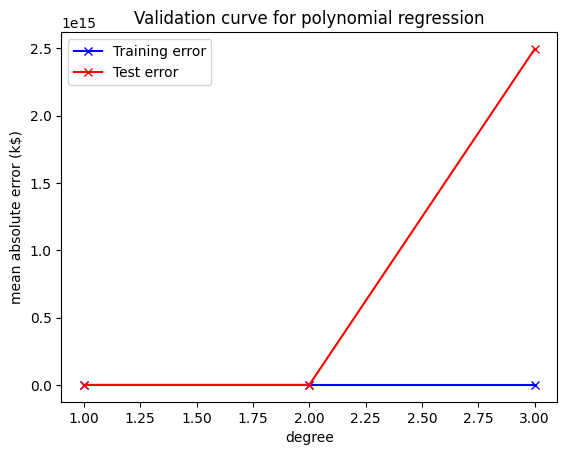

In [34]:
plt.plot(degree, train_error.mean(axis= 1), 'b-x', label= 'Training error')
plt.plot(degree, test_error.mean(axis= 1), 'r-x', label= 'Test error')
plt.legend()

plt.xlabel('degree')
plt.ylabel('mean absolute error (k$)')
plots = plt.title('Validation curve for polynomial regression')

### testing different regression techniques for batter test score

In [38]:
ridge_reg_pipeline = Pipeline([
  ('feature_scaling', main_pipeline),
  ('ridge', Ridge(alpha= 0.001))
])
ridge_reg_pipeline.fit(x_train, y_train)
ridge_reg_pipeline.score(x_train, y_train)

0.7285671748153697

In [40]:
ridge_reg_pipeline.score(x_test, y_test)

0.7263645989502575

In [42]:
lasso_reg_pipeline = Pipeline([
  ('feature_scaling', main_pipeline),
  ('lasso', Lasso(alpha= 0.01))
])

lasso_reg_pipeline.fit(x_train, y_train)
lasso_reg_pipeline.score(x_train, y_train)

0.7254496995114565

In [43]:
lasso_reg_pipeline.score(x_test, y_test)

0.7230140518209615

In [33]:
submission = pd.DataFrame(columns= ['ID', "total_amount"])
submission['ID'] = [i for i in range(1, 50001)]
submission['total_amount'] = lin_reg_cv_estimator.predict(test_pd)
submission.to_csv('submission.csv', index=False)